<a href="https://colab.research.google.com/github/athishr88/NN_DL/blob/main/Coding_tutorial/CT10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Coding Tutorial - 10
## VQA model: Given an image with an associated question, predict an answer

## PART 1: Set up the dataset: VizWiz-VQA dataset (More details here: https://vizwiz.org/tasks-and-datasets/vqa/)
## PART 2: Template code to build a VQA model
## PART 3: Save results to "results.csv" file
## PART 4: Evaluation metric


In [2]:
## PART 1. Set up the VizWiz-VQA dataset

img_dir = "https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/"

split = "train"
annotation_file = "https://ivc.ischool.utexas.edu/VizWiz_final/vqa_data/Annotations/%s.json" %split
annotation_file

'https://ivc.ischool.utexas.edu/VizWiz_final/vqa_data/Annotations/train.json'

In [3]:
# Visualize the images
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_img(url):
  image = io.imread(url)
  print(url)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

VizWiz_train_00000000.jpg
What's the name of this product?
basil leaves
https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/VizWiz_train_00000000.jpg


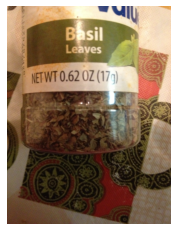

In [7]:
## Read the dataset to extract each dataset example with answer

import requests
import numpy as np

split_data = requests.get(annotation_file, allow_redirects=True)
data = split_data.json()

# Visulaize an example
vq = data[0]
image_name = vq["image"]
image_url = img_dir+image_name

question = vq["question"]
answers = vq["answers"]
label = answers[0]["answer"]

print(image_name)
print(question)
print(label)
visualize_img(image_url)

In [6]:
## Part 2: Template code to setup a VQA model
# - Extract features from image
# - Extract features from question
# - Combine image and question features
# - Train and predict

# Extract features from image
def extract_image_features(image_url):
  ## add steps to extract features
  feature_vector = [0, 1, 1]
  return feature_vector

# Extract features from question
def extract_question_features(question):
  feature_vector = [1, 1, 1]
  return feature_vector



VizWiz_train_00000000.jpg
What's the name of this product?
{'answer_confidence': 'yes', 'answer': 'basil leaves'}
[1 1 1 0 1 1]
https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/VizWiz_train_00000000.jpg


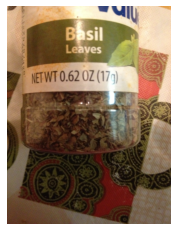

VizWiz_train_00000001.jpg
Can you tell me what is in this can please?
{'answer_confidence': 'yes', 'answer': 'soda'}
[1 1 1 0 1 1]
https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/VizWiz_train_00000001.jpg


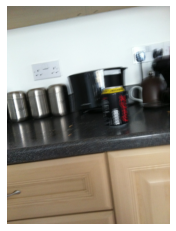

VizWiz_train_00000002.jpg
Is this enchilada sauce or is this tomatoes?  Thank you.
{'answer_confidence': 'yes', 'answer': 'these tomatoes not enchilada sauce'}
[1 1 1 0 1 1]
https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/VizWiz_train_00000002.jpg


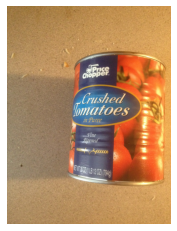

VizWiz_train_00000003.jpg
What is the captcha on this screenshot?
{'answer_confidence': 'yes', 'answer': 't36m'}
[1 1 1 0 1 1]
https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/VizWiz_train_00000003.jpg


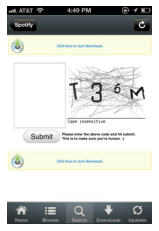

VizWiz_train_00000004.jpg
What is this item?
{'answer_confidence': 'yes', 'answer': 'solar garden light'}
[1 1 1 0 1 1]
https://vizwiz.cs.colorado.edu//VizWiz_visualization_img/VizWiz_train_00000004.jpg


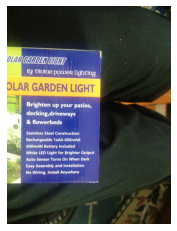

In [8]:
## Setup a model
num_VQs = 5
X = [] # features (image and question)
y = [] # target_output

for vq in data[0:num_VQs]:
  image_name = vq["image"]
  image_url = img_dir+image_name
  image_features = extract_image_features(image_url)

  question = vq["question"]
  question_features = extract_question_features(question)

  # Combine features (concatenate)
  multimodel_features = np.concatenate((question_features, image_features))

  # Prepare features and labels
  X.append(multimodel_features)
  answers = vq["answers"]
  label = answers[0]
  y.append(label)

  # Print and visualize samples and features
  print(image_name)
  print(question)
  print(label)
  print(multimodel_features)
  visualize_img(image_url)

In [9]:
## PART 3: Create fake results file and save to "results.csv"

## create fake results
results = ["unanswerable"]*len(data)
print(results[0:5])

## save results to results.csv
import pandas as pd
df = pd.DataFrame(results)
df.to_csv("results.csv", header = None, index = None)

['unanswerable', 'unanswerable', 'unanswerable', 'unanswerable', 'unanswerable']


In [10]:
## PART 4: Evaluate results based on the VQA evaluation metric
## Details of the evaluation metric here: https://vizwiz.org/tasks-and-datasets/vqa/
import numpy as np

# All answers
gtlist = [x['answers'] for x in data]

# Save the accuracies
acc_list = []
i = 0

# Compute accuracy for each image
for pred in results:

    # Get the GT answer list and preprocess
    gt_ans = gtlist[i] 
    gt_ans = [x['answer'] for x in gt_ans]
    gt_ans = [x.lower() for x in gt_ans]

    # Compute accuracy (compare with at least 3 human answers)
    cur_acc = np.minimum(1.0, gt_ans.count(pred)/3.0)

    acc_list.append(cur_acc)
    i +=1

print ('Accuracy: {}'.format(round(np.mean(acc_list), 2)))

Accuracy: 0.34
